# Preparation

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile

## Import Data

In [2]:
with ZipFile('fake-and-real-news-dataset.zip') as raw_zip:
    raw_zip.extractall(path='datasets')
    
    file_name = raw_zip.namelist()
    
    raw_data = []
    
    for file in file_name:
        raw_data.append(pd.read_csv(f'datasets/{file}'))
        
    print(file_name)

['Fake.csv', 'True.csv']


In [3]:
fake_news = raw_data[0]
real_news = raw_data[1]

## Sampling Data

In [4]:
from sklearn.utils.random import sample_without_replacement

fake_news_index_sampling = sample_without_replacement(fake_news.shape[0], 5000, random_state=0)
real_news_index_sampling = sample_without_replacement(real_news.shape[0], 5000, random_state=0)

fake_news_sampled = fake_news.loc[:]#fake_news_index_sampling]
real_news_sampled = real_news.loc[:]#real_news_index_sampling]

## Add Label

In [5]:
fake_news_sampled['fake'] = 1
real_news_sampled['fake'] = 0

## Concat Data

In [6]:
full_data = pd.concat([fake_news_sampled, real_news_sampled], axis=0)

full_data.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
data = full_data[['title', 'fake']]

data.head()

,title,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


# Exploratory Data Analysis

## Visualize the Length

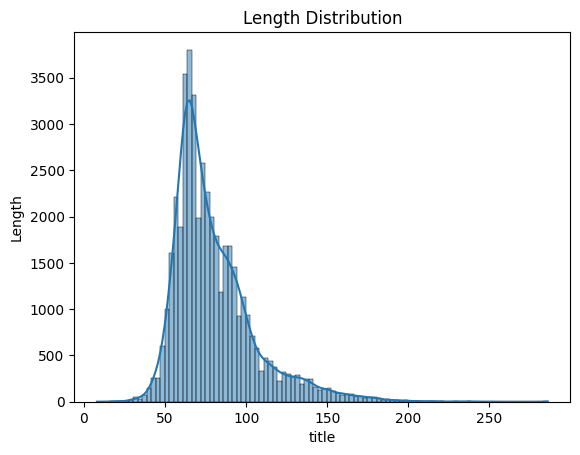

In [8]:
sns.histplot(data['title'].apply(len), kde=True, bins=100)

plt.ylabel('Length')
plt.title('Length Distribution')

plt.show()

# Data Preprocessing

## Remove Punctuation

In [9]:
from string import punctuation

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in (punctuation + '‘’')])
    return punctuationfree

data['clean_title']= data['title'].apply(lambda x:remove_punctuation(x))
data.head()

/tmp/ipykernel_36567/1572702791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_title']= data['title'].apply(lambda x:remove_punctuation(x))


,title,fake,clean_title
0,Donald Trump Sends Out Embarrassing New Year’...,1,Donald Trump Sends Out Embarrassing New Years...
1,Drunk Bragging Trump Staffer Started Russian ...,1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,1,Trump Is So Obsessed He Even Has Obamas Name ...
4,Pope Francis Just Called Out Donald Trump Dur...,1,Pope Francis Just Called Out Donald Trump Dur...


In [10]:
data = data.drop('title', axis=1)

data.head()

,fake,clean_title
0,1,Donald Trump Sends Out Embarrassing New Years...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obamas Name ...
4,1,Pope Francis Just Called Out Donald Trump Dur...


## Lowering the Text

In [11]:
data['lower_title'] = data['clean_title'].apply(lambda x: x.lower())

data.head()

,fake,clean_title,lower_title
0,1,Donald Trump Sends Out Embarrassing New Years...,donald trump sends out embarrassing new years...
1,1,Drunk Bragging Trump Staffer Started Russian ...,drunk bragging trump staffer started russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clarke becomes an internet joke...
3,1,Trump Is So Obsessed He Even Has Obamas Name ...,trump is so obsessed he even has obamas name ...
4,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis just called out donald trump dur...


In [12]:
data = data.drop('clean_title', axis=1)

data.head()

,fake,lower_title
0,1,donald trump sends out embarrassing new years...
1,1,drunk bragging trump staffer started russian ...
2,1,sheriff david clarke becomes an internet joke...
3,1,trump is so obsessed he even has obamas name ...
4,1,pope francis just called out donald trump dur...


## Tokenization

In [13]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

data['tokenized_title'] = data['lower_title'].apply(lambda x: word_tokenize(x))

data.head()

[nltk_data] Downloading package punkt to /home/alfian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,fake,lower_title,tokenized_title
0,1,donald trump sends out embarrassing new years...,"[donald, trump, sends, out, embarrassing, new,..."
1,1,drunk bragging trump staffer started russian ...,"[drunk, bragging, trump, staffer, started, rus..."
2,1,sheriff david clarke becomes an internet joke...,"[sheriff, david, clarke, becomes, an, internet..."
3,1,trump is so obsessed he even has obamas name ...,"[trump, is, so, obsessed, he, even, has, obama..."
4,1,pope francis just called out donald trump dur...,"[pope, francis, just, called, out, donald, tru..."


In [14]:
data = data.drop('lower_title', axis=1)

data.head()

,fake,tokenized_title
0,1,"[donald, trump, sends, out, embarrassing, new,..."
1,1,"[drunk, bragging, trump, staffer, started, rus..."
2,1,"[sheriff, david, clarke, becomes, an, internet..."
3,1,"[trump, is, so, obsessed, he, even, has, obama..."
4,1,"[pope, francis, just, called, out, donald, tru..."


## Remove Stop Words

In [15]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords_english = stopwords.words('english')

def remove_stopwords(text):
    output = [i for i in text if i not in stopwords_english]
    return output

data['no_stopwords_title'] = data['tokenized_title'].apply(lambda x: remove_stopwords(x))

data.head()

[nltk_data] Downloading package stopwords to /home/alfian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,fake,tokenized_title,no_stopwords_title
0,1,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, embarrassing, new, year..."
1,1,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus..."
2,1,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, internet, jo..."
3,1,"[trump, is, so, obsessed, he, even, has, obama...","[trump, obsessed, even, obamas, name, coded, w..."
4,1,"[pope, francis, just, called, out, donald, tru...","[pope, francis, called, donald, trump, christm..."


In [16]:
data = data.drop('tokenized_title', axis=1)

data.head()

,fake,no_stopwords_title
0,1,"[donald, trump, sends, embarrassing, new, year..."
1,1,"[drunk, bragging, trump, staffer, started, rus..."
2,1,"[sheriff, david, clarke, becomes, internet, jo..."
3,1,"[trump, obsessed, even, obamas, name, coded, w..."
4,1,"[pope, francis, called, donald, trump, christm..."


## Stemming

In [17]:
from nltk.stem import PorterStemmer

stemer = PorterStemmer()

def stemming(text):
    stem_text = [stemer.stem(word) for word in text]
    
    return stem_text

data['stemmed_title'] = data['no_stopwords_title'].apply(lambda x: stemming(x))

data.head()

,fake,no_stopwords_title,stemmed_title
0,1,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, send, embarrass, new, year, ev..."
1,1,"[drunk, bragging, trump, staffer, started, rus...","[drunk, brag, trump, staffer, start, russian, ..."
2,1,"[sheriff, david, clarke, becomes, internet, jo...","[sheriff, david, clark, becom, internet, joke,..."
3,1,"[trump, obsessed, even, obamas, name, coded, w...","[trump, obsess, even, obama, name, code, websi..."
4,1,"[pope, francis, called, donald, trump, christm...","[pope, franci, call, donald, trump, christma, ..."


In [18]:
data = data.drop('no_stopwords_title', axis=1)

data.head()

,fake,stemmed_title
0,1,"[donald, trump, send, embarrass, new, year, ev..."
1,1,"[drunk, brag, trump, staffer, start, russian, ..."
2,1,"[sheriff, david, clark, becom, internet, joke,..."
3,1,"[trump, obsess, even, obama, name, code, websi..."
4,1,"[pope, franci, call, donald, trump, christma, ..."


## Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatizing(text):
    lemm_text = [lemmatizer.lemmatize(word) for word in text]
    
    return lemm_text

data['lemmatized_title'] = data['stemmed_title'].apply(lambda x: lemmatizing(x))

data.head()

[nltk_data] Downloading package wordnet to /home/alfian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,fake,stemmed_title,lemmatized_title
0,1,"[donald, trump, send, embarrass, new, year, ev...","[donald, trump, send, embarrass, new, year, ev..."
1,1,"[drunk, brag, trump, staffer, start, russian, ...","[drunk, brag, trump, staffer, start, russian, ..."
2,1,"[sheriff, david, clark, becom, internet, joke,...","[sheriff, david, clark, becom, internet, joke,..."
3,1,"[trump, obsess, even, obama, name, code, websi...","[trump, ob, even, obama, name, code, websit, i..."
4,1,"[pope, franci, call, donald, trump, christma, ...","[pope, franci, call, donald, trump, christma, ..."


In [20]:
data = data.drop('stemmed_title', axis=1)

data.head()

,fake,lemmatized_title
0,1,"[donald, trump, send, embarrass, new, year, ev..."
1,1,"[drunk, brag, trump, staffer, start, russian, ..."
2,1,"[sheriff, david, clark, becom, internet, joke,..."
3,1,"[trump, ob, even, obama, name, code, websit, i..."
4,1,"[pope, franci, call, donald, trump, christma, ..."


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data['lemmatized_title'],
    data['fake'],
    test_size=0.2,
    random_state=0
)

## Vectorization

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def dummy(doc):
    return doc

vectorizer = CountVectorizer(
    decode_error='ignore',
    tokenizer=dummy,
    preprocessor=dummy,
    max_features=5000
)

vectorizer.fit(X_train)

/home/alfian/.local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(decode_error='ignore', max_features=5000,
                preprocessor=<function dummy at 0x7f45c07bfba0>,
                tokenizer=<function dummy at 0x7f45c07bfba0>)

# Data Transformation

In [34]:
X_train_transformed = vectorizer.transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

y_train_transformed = np.array(y_train)
y_test_transformed = np.array(y_test)

In [35]:
full_train = np.concatenate(
    [X_train_transformed.toarray(), y_train_transformed.reshape(-1, 1)],
    axis=1
)

# Modeling

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)

In [37]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(
    lr_model,
    X_train_transformed,
    y_train_transformed,
    cv=10,
    scoring='accuracy',
    verbose=100
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] START .....................................................................


/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.942) total time=   0.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.954) total time=   0.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[CV] START .....................................................................


/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.952) total time=   0.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.956) total time=   0.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[CV] START .....................................................................


/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.948) total time=   0.3s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.944) total time=   0.3s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.4s remaining:    0.0s
[CV] START .....................................................................


/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.956) total time=   0.3s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.7s remaining:    0.0s
[CV] START .....................................................................


/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.950) total time=   0.3s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.0s remaining:    0.0s
[CV] START .....................................................................


/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.937) total time=   0.3s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.3s remaining:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.944) total time=   0.3s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6s finished


/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
lr_cv.mean()

0.9482984636175937

## Neural Network

In [51]:
from tensorflow.keras import Sequential, layers, callbacks, optimizers

nn_model = Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

nn_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.00007),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

nn_model_history = nn_model.fit(
    X_train_transformed.toarray(),
    y_train_transformed,
    epochs=50,
    batch_size=256,
    validation_split=0.25,
    callbacks=[
        callbacks.EarlyStopping(patience=20, restore_best_weights=True)
    ]
)

Epoch 1/50
106/106 [==============================] - 9s 22ms/step - loss: 0.6925 - accuracy: 0.5172 - val_loss: 0.6905 - val_accuracy: 0.6327
Epoch 2/50
106/106 [==============================] - 1s 13ms/step - loss: 0.6857 - accuracy: 0.6054 - val_loss: 0.6758 - val_accuracy: 0.7979
Epoch 3/50
106/106 [==============================] - 2s 15ms/step - loss: 0.6656 - accuracy: 0.7030 - val_loss: 0.6417 - val_accuracy: 0.8761
Epoch 4/50
106/106 [==============================] - 2s 16ms/step - loss: 0.6294 - accuracy: 0.7711 - val_loss: 0.5961 - val_accuracy: 0.9013
Epoch 5/50
106/106 [==============================] - 1s 12ms/step - loss: 0.5872 - accuracy: 0.8102 - val_loss: 0.5468 - val_accuracy: 0.9091
Epoch 6/50
106/106 [==============================] - 1s 12ms/step - loss: 0.5430 - accuracy: 0.8368 - val_loss: 0.4965 - val_accuracy: 0.9136
Epoch 7/50
106/106 [==============================] - 1s 12ms/step - loss: 0.4998 - accuracy: 0.8568 - val_loss: 0.4475 - val_accuracy: 0.9183

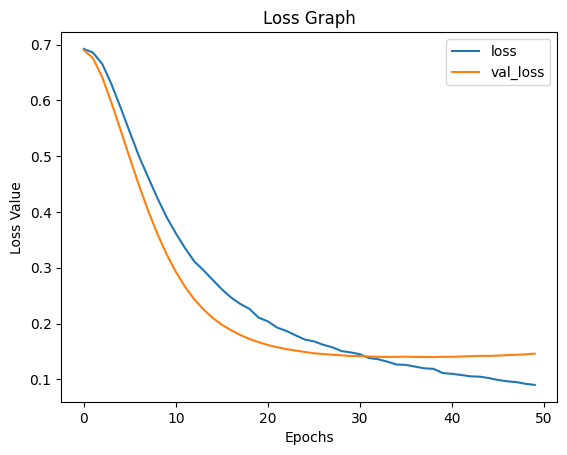

In [52]:
pd.DataFrame(nn_model_history.history)[['loss', 'val_loss']].plot()

plt.title('Loss Graph')

plt.xlabel('Epochs')
plt.ylabel('Loss Value')

plt.show()